In [1]:
import yfinance as yf 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import os
os.environ["YFINANCE_CACHE_DISABLE"] = "1"

In [2]:
tickers = ['EURUSD=X', 'GBPUSD=X', 'USDJPY=X', 'HUFUSD=X']
df = yf.download(tickers, start='2022-01-01', end='2024-12-31')
df = df['Close'].dropna()

C:\Users\arthu\AppData\Local\Temp\ipykernel_7248\368047885.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start='2022-01-01', end='2024-12-31')
[*********************100%***********************]  4 of 4 completed


In [3]:
df_returns = df.pct_change()
df_log_returns = np.log(df/df.shift(1))
df_log_returns.dropna()
cum_log_returns = (1+df_log_returns).cumprod()

cor_matrix = df_log_returns.corr()

C:\Users\arthu\AppData\Local\Temp\ipykernel_7248\3823157534.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


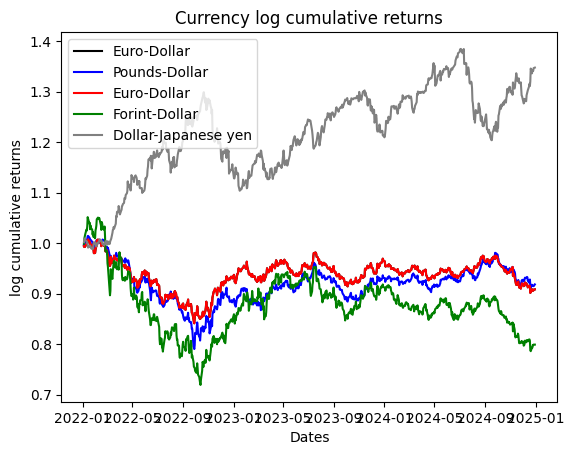

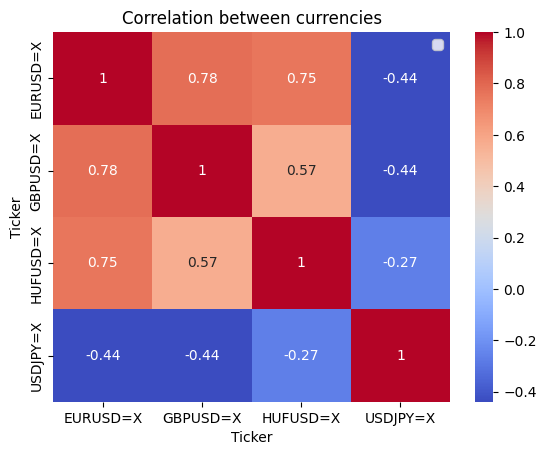

In [4]:
plt.figure()
plt.plot(cum_log_returns.index, cum_log_returns['EURUSD=X'], color='black', label='Euro-Dollar')
plt.plot(cum_log_returns.index, cum_log_returns['GBPUSD=X'], color='blue', label='Pounds-Dollar')
plt.plot(cum_log_returns.index, cum_log_returns['EURUSD=X'], color='red', label='Euro-Dollar')
plt.plot(cum_log_returns.index, cum_log_returns['HUFUSD=X'], color='green', label='Forint-Dollar')
plt.plot(cum_log_returns.index, cum_log_returns['USDJPY=X'], color='grey', label='Dollar-Japanese yen')
plt.ylabel('log cumulative returns')
plt.xlabel('Dates')
plt.title('Currency log cumulative returns')
plt.legend()
plt.plot()

plt.figure()
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between currencies')
plt.legend()
plt.show()